# Datos Faltantes

En el siguiente documento se presenta la evaluación de 4 métodos:
* Promedio Anual
* Promedio Mensual
* Promedio Móvil (7 días)
* Linear Regression
        
para remplazar datos faltantes en una serie de datos.

In [1]:
# librerías
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

# Para modelar los datos, vamos a necesitar de la libreria sklearn
from sklearn.linear_model import LinearRegression as LinReg
%matplotlib inline

In [2]:
# Constantes
LIMITE_SUPERIOR_NUMEROS_RANDOM = 100
CANTIDAD_NUMEROS_RANDOM = 20

In [3]:
# leer csv
df = pd.read_csv("data/data_22581.csv")

In [4]:
# estructura del df
df.head()

,numero,fecha,prec,tmax,tmin,tmed,velvmax,velv,dirvvmax,dirv,radg,humr,et,ep,porc
0,22581,01/05/2003 00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,111111
1,22581,02/05/2003 00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,111111
2,22581,03/05/2003 00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,111111
3,22581,04/05/2003 00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,111111
4,22581,05/05/2003 00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,111111


In [5]:
# información temperatura
df = df[['numero', 'fecha', 'tmax', 'tmin', 'tmed']]

In [6]:
# información del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5507 entries, 0 to 5506
Data columns (total 5 columns):
numero    5507 non-null int64
fecha     5507 non-null object
tmax      5471 non-null float64
tmin      5471 non-null float64
tmed      5471 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 215.2+ KB


In [7]:
# eliminar datos nulos
df.dropna(inplace=True)

In [8]:
# estructura df
df.head()

,numero,fecha,tmax,tmin,tmed
28,22581,29/05/2003 00:00,27.8,17.5,22.26
29,22581,30/05/2003 00:00,27.9,13.6,19.58
30,22581,31/05/2003 00:00,29.5,13.5,21.64
31,22581,01/06/2003 00:00,30.3,14.6,21.40
32,22581,02/06/2003 00:00,29.0,16.9,20.56


In [9]:
# información del df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5471 entries, 28 to 5506
Data columns (total 5 columns):
numero    5471 non-null int64
fecha     5471 non-null object
tmax      5471 non-null float64
tmin      5471 non-null float64
tmed      5471 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 256.5+ KB


In [10]:
#df.index = df['fecha']

In [11]:
#df["tmax"].plot(figsize=(15,5))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5471 entries, 28 to 5506
Data columns (total 5 columns):
numero    5471 non-null int64
fecha     5471 non-null object
tmax      5471 non-null float64
tmin      5471 non-null float64
tmed      5471 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 256.5+ KB


In [13]:
# crear las columnas año, mes, día
def generarMes(f):
    dia,mes,anio = f.split(" ")[0].split("/")
    return mes

def generarDia(f):
    dia,mes,anio = f.split(" ")[0].split("/")
    return dia

df["año"] = pd.DatetimeIndex(df['fecha']).year


In [14]:
df["mes"] = df.apply(lambda x: generarMes(x['fecha']), axis=1)
df["dia"] = df.apply(lambda x: generarDia(x['fecha']), axis=1)

In [15]:
# estructura del df
df.head(20)

,numero,fecha,tmax,tmin,tmed,año,mes,dia
28,22581,29/05/2003 00:00,27.8,17.5,22.26,2003,05,29
29,22581,30/05/2003 00:00,27.9,13.6,19.58,2003,05,30
30,22581,31/05/2003 00:00,29.5,13.5,21.64,2003,05,31
31,22581,01/06/2003 00:00,30.3,14.6,21.40,2003,06,01
32,22581,02/06/2003 00:00,29.0,16.9,20.56,2003,06,02
33,22581,03/06/2003 00:00,28.8,16.0,22.15,2003,06,03
34,22581,04/06/2003 00:00,27.4,17.0,21.62,2003,06,04
35,22581,05/06/2003 00:00,29.9,14.6,22.12,2003,06,05
36,22581,06/06/2003 00:00,30.2,13.2,22.59,2003,06,06
37,22581,07/06/2003 00:00,30.3,15.6,23.07,2003,06,07


In [16]:
# rango de datos
anio_tx = df['año'].max()
anio_tn = df['año'].min()

In [17]:
# crear las columnas para procesamiento
df['tmax_promAnual'] = df['tmax']
df['tmin_promAnual'] = df['tmin']

df['tmax_lr'] = df['tmax']
df['tmin_lr'] = df['tmin']

df['tmax_promMen'] = df['tmax']
df['tmin_promMen'] = df['tmin']

In [18]:
# estructura del df
df.tail()

,numero,fecha,tmax,tmin,tmed,año,mes,dia,tmax_promAnual,tmin_promAnual,tmax_lr,tmin_lr,tmax_promMen,tmin_promMen
5502,22581,24/05/2018 00:00,32.4,12.4,23.39,2018,05,24,32.4,12.4,32.4,12.4,32.4,12.4
5503,22581,25/05/2018 00:00,31.8,14.3,23.40,2018,05,25,31.8,14.3,31.8,14.3,31.8,14.3
5504,22581,26/05/2018 00:00,31.5,13.3,23.59,2018,05,26,31.5,13.3,31.5,13.3,31.5,13.3
5505,22581,27/05/2018 00:00,33.3,10.4,23.88,2018,05,27,33.3,10.4,33.3,10.4,33.3,10.4
5506,22581,28/05/2018 00:00,34.2,11.6,24.81,2018,05,28,34.2,11.6,34.2,11.6,34.2,11.6


In [19]:
# longitud 
longitud_array_datos = len(df['tmax_promAnual'])

In [20]:
# generar números aleatorios
numeros_random = np.random.randint(0,LIMITE_SUPERIOR_NUMEROS_RANDOM,CANTIDAD_NUMEROS_RANDOM)
numeros_random

array([16, 29, 58, 84, 68, 80, 44, 87, 58, 20, 40, 65, 35, 52, 35,  4, 12,
       78,  1, 64])

In [21]:
numeros_eliminar = numeros_random * -1
numeros_eliminar
    

array([-16, -29, -58, -84, -68, -80, -44, -87, -58, -20, -40, -65, -35,
       -52, -35,  -4, -12, -78,  -1, -64])

In [22]:
# generar espacios de información
for numero in numeros_eliminar:
    df.iloc[longitud_array_datos+numero:longitud_array_datos+numero+1, 8:] = np.nan

In [23]:
# desplegar los datos nulos
df_nulos = df[df['tmax_promAnual'].isnull()]

In [24]:
# funcion promedio anual
def promedioAnual(df_original,month,day):
    df_temporal = df_original.where((df_original['mes'] == month) & (df_original['dia'] == day)).dropna()
    tMax = df_temporal['tmax'].mean()
    tMin = df_temporal['tmin'].mean()
    return tMax, tMin

# funcion media móvil (7)
def promedioMensual(df_original,year,month):
    df_Mensual = df_original.where((df_original['año'] == year) & (df_original['mes'] == month)).dropna()
    tMax_mensual = df_Mensual['tmax'].mean()
    tMin_mensual = df_Mensual['tmin'].mean()
    return tMax_mensual, tMin_mensual

def generarLinearRegression(df_original, month, day):
    df_temp = df_original.where((df_original['año'] < 2018) & (df_original['mes'] == month) & (df_original['dia'] == day)).dropna()
    # columan de objeto a tiempo
    times = pd.DatetimeIndex(df_temp['fecha'])
    grouped = df_temp.groupby([times.year]).mean()
    X = grouped.index.values.reshape(-1, 1)
    # tmax
    y_tmax = grouped['tmax'].values
    reg = LinReg()
    reg.fit(X,y_tmax)
    tmax_lr = reg.predict(2018)
    print("Certeza:" + str(reg.score(X,y_tmax)))
    # tmin
    y_tmin = grouped['tmin'].values
    reg = LinReg()
    reg.fit(X,y_tmin)
    tmin_lr = reg.predict(2018)
    return tmax_lr, tmin_lr

In [25]:
# crear el df resutlado
cols = ['numero', 'fecha', 'tmax', 'tmin', 'tmed', 'año', 'mes', 'dia',
       'tmax_promAnual', 'tmin_promAnual', 'tmax_lr', 'tmin_lr',
       'tmax_promMen', 'tmin_promMen']
resultado = pd.DataFrame(columns=cols)

In [26]:
resultado.head()

,numero,fecha,tmax,tmin,tmed,año,mes,dia,tmax_promAnual,tmin_promAnual,tmax_lr,tmin_lr,tmax_promMen,tmin_promMen


In [27]:
df.columns

Index(['numero', 'fecha', 'tmax', 'tmin', 'tmed', 'año', 'mes', 'dia',
       'tmax_promAnual', 'tmin_promAnual', 'tmax_lr', 'tmin_lr',
       'tmax_promMen', 'tmin_promMen'],
      dtype='object')

In [28]:
# valor promedio de temperatura máxima
for index, row in df_nulos.iterrows():
    # print(index)
    tmax_anual, tmin_anual = promedioAnual(df, row["mes"], row['dia'])
    tmax_men, tmin_men = promedioMensual(df, row['año'], row['mes'])
    tmax_lr, tmin_lr = generarLinearRegression(df, row["mes"], row['dia'])
    d = {"numero" : row['numero'],
         "fecha" : row['fecha'],
         "tmax" : row['tmax'],
         "tmin" : row['tmin'],
         "tmed" : row['tmed'],
         "año" : row['año'],
         "mes" : row['mes'],
         "dia" : row['dia'],
         "tmax_promAnual" : tmax_anual,
         "tmin_promAnual" : tmin_anual,
         "tmax_lr" : tmax_lr[0],
         "tmin_lr" : tmin_lr[0],
         "tmax_promMen" : tmax_men,
         "tmin_promMen" : tmin_men
        }
    resultado = resultado.append(d, ignore_index=True)
resultado.head(20)

Certeza:0.0165537225378
Certeza:5.46146601348e-05
Certeza:0.236456965441
Certeza:0.334477988597
Certeza:0.0608522121416
Certeza:0.0327173686898
Certeza:0.226201629614
Certeza:0.0427897567871
Certeza:0.236709595081
Certeza:0.151169478836
Certeza:0.357205723978
Certeza:0.438650629873
Certeza:0.0879673819097
Certeza:0.0257199595339
Certeza:0.0586529946399
Certeza:0.374200387847
Certeza:0.0105148638792
Certeza:0.0019158459716


,numero,fecha,tmax,tmin,tmed,año,mes,dia,tmax_promAnual,tmin_promAnual,tmax_lr,tmin_lr,tmax_promMen,tmin_promMen
0,22581,03/03/2018 00:00,28.8,12.1,18.71,2018,03,03,25.921429,5.607143,25.293407,5.078022,28.366667,5.495833
1,22581,06/03/2018 00:00,27.4,5.6,18.44,2018,03,06,25.914286,5.971429,25.937363,5.793407,28.366667,5.495833
2,22581,10/03/2018 00:00,29.0,5.5,19.37,2018,03,10,23.535714,6.157143,20.540659,5.181319,28.366667,5.495833
3,22581,12/03/2018 00:00,30.0,11.4,20.20,2018,03,12,24.814286,5.028571,22.025275,3.212088,28.366667,5.495833
4,22581,22/03/2018 00:00,30.0,6.0,18.92,2018,03,22,27.457143,6.892857,28.202198,5.312088,28.366667,5.495833
5,22581,25/03/2018 00:00,30.9,7.3,20.14,2018,03,25,27.500000,7.178571,28.113187,8.297802,28.366667,5.495833
6,22581,26/03/2018 00:00,31.4,7.0,20.65,2018,03,26,27.164286,8.271429,25.576923,9.563736,28.366667,5.495833
7,22581,01/04/2018 00:00,28.7,6.1,19.14,2018,04,01,27.557143,6.664286,28.424176,6.309890,29.250000,8.954167
8,22581,07/04/2018 00:00,29.1,6.1,19.72,2018,04,07,28.814286,8.664286,30.479121,8.332967,29.250000,8.954167
9,22581,15/04/2018 00:00,26.5,7.5,16.77,2018,04,15,28.114286,9.828571,26.515385,12.568132,29.250000,8.954167


In [29]:
resultado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 14 columns):
numero            18 non-null object
fecha             18 non-null object
tmax              18 non-null float64
tmin              18 non-null float64
tmed              18 non-null float64
año               18 non-null object
mes               18 non-null object
dia               18 non-null object
tmax_promAnual    18 non-null float64
tmin_promAnual    18 non-null float64
tmax_lr           18 non-null float64
tmin_lr           18 non-null float64
tmax_promMen      18 non-null float64
tmin_promMen      18 non-null float64
dtypes: float64(9), object(5)
memory usage: 2.0+ KB


In [30]:
df_no_nulos = df.where(df['tmax_promAnual'] != np.nan).dropna()

In [31]:
df_no_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5453 entries, 28 to 5505
Data columns (total 14 columns):
numero            5453 non-null int64
fecha             5453 non-null object
tmax              5453 non-null float64
tmin              5453 non-null float64
tmed              5453 non-null float64
año               5453 non-null int64
mes               5453 non-null object
dia               5453 non-null object
tmax_promAnual    5453 non-null float64
tmin_promAnual    5453 non-null float64
tmax_lr           5453 non-null float64
tmin_lr           5453 non-null float64
tmax_promMen      5453 non-null float64
tmin_promMen      5453 non-null float64
dtypes: float64(9), int64(2), object(3)
memory usage: 639.0+ KB


In [32]:
df_no_nulos.columns

Index(['numero', 'fecha', 'tmax', 'tmin', 'tmed', 'año', 'mes', 'dia',
       'tmax_promAnual', 'tmin_promAnual', 'tmax_lr', 'tmin_lr',
       'tmax_promMen', 'tmin_promMen'],
      dtype='object')

In [33]:
resultado.columns

Index(['numero', 'fecha', 'tmax', 'tmin', 'tmed', 'año', 'mes', 'dia',
       'tmax_promAnual', 'tmin_promAnual', 'tmax_lr', 'tmin_lr',
       'tmax_promMen', 'tmin_promMen'],
      dtype='object')

In [34]:
resultado = resultado.append(df_no_nulos, ignore_index=True)
resultado.count()

numero            5471
fecha             5471
tmax              5471
tmin              5471
tmed              5471
año               5471
mes               5471
dia               5471
tmax_promAnual    5471
tmin_promAnual    5471
tmax_lr           5471
tmin_lr           5471
tmax_promMen      5471
tmin_promMen      5471
dtype: int64

In [35]:
# ordenar por año, mes, día
resultado.sort_values(by=['año','mes','dia'], inplace=True)

In [36]:
# promedio móvil tmax
resultado['tmax_promedios_moviles'] = (resultado['tmax'].shift(1) + resultado['tmax'].shift(2) + resultado['tmax'].shift(3) + resultado['tmax'].shift(4) + resultado['tmax'].shift(5) + resultado['tmax'].shift(6) + resultado['tmax'].shift(7)) / 7

In [37]:
# promedio móvil tmin
resultado['tmin_promedios_moviles'] = (resultado['tmin'].shift(1) + resultado['tmin'].shift(2) + resultado['tmin'].shift(3) + resultado['tmin'].shift(4) + resultado['tmin'].shift(5) + resultado['tmin'].shift(6) + resultado['tmin'].shift(7)) / 7

In [38]:
resultado.head(20)

,numero,fecha,tmax,tmin,tmed,año,mes,dia,tmax_promAnual,tmin_promAnual,tmax_lr,tmin_lr,tmax_promMen,tmin_promMen,tmax_promedios_moviles,tmin_promedios_moviles
18,22581,29/05/2003 00:00,27.8,17.5,22.26,2003,05,29,27.8,17.5,27.8,17.5,27.8,17.5,NaN,NaN
19,22581,30/05/2003 00:00,27.9,13.6,19.58,2003,05,30,27.9,13.6,27.9,13.6,27.9,13.6,NaN,NaN
20,22581,31/05/2003 00:00,29.5,13.5,21.64,2003,05,31,29.5,13.5,29.5,13.5,29.5,13.5,NaN,NaN
21,22581,01/06/2003 00:00,30.3,14.6,21.40,2003,06,01,30.3,14.6,30.3,14.6,30.3,14.6,NaN,NaN
22,22581,02/06/2003 00:00,29.0,16.9,20.56,2003,06,02,29.0,16.9,29.0,16.9,29.0,16.9,NaN,NaN
23,22581,03/06/2003 00:00,28.8,16.0,22.15,2003,06,03,28.8,16.0,28.8,16.0,28.8,16.0,NaN,NaN
24,22581,04/06/2003 00:00,27.4,17.0,21.62,2003,06,04,27.4,17.0,27.4,17.0,27.4,17.0,NaN,NaN
25,22581,05/06/2003 00:00,29.9,14.6,22.12,2003,06,05,29.9,14.6,29.9,14.6,29.9,14.6,28.671429,15.585714
26,22581,06/06/2003 00:00,30.2,13.2,22.59,2003,06,06,30.2,13.2,30.2,13.2,30.2,13.2,28.971429,15.171429
27,22581,07/06/2003 00:00,30.3,15.6,23.07,2003,06,07,30.3,15.6,30.3,15.6,30.3,15.6,29.300000,15.114286


In [39]:
resultado.tail(LIMITE_SUPERIOR_NUMEROS_RANDOM)

,numero,fecha,tmax,tmin,tmed,año,mes,dia,tmax_promAnual,tmin_promAnual,tmax_lr,tmin_lr,tmax_promMen,tmin_promMen,tmax_promedios_moviles,tmin_promedios_moviles
5389,22581,18/02/2018 00:00,25.0,7.3,16.56,2018,02,18,25.000000,7.300000,25.000000,7.300000,25.000000,7.300000,25.528571,6.400000
5390,22581,19/02/2018 00:00,23.2,11.3,16.63,2018,02,19,23.200000,11.300000,23.200000,11.300000,23.200000,11.300000,26.085714,6.757143
5391,22581,20/02/2018 00:00,23.5,9.4,15.67,2018,02,20,23.500000,9.400000,23.500000,9.400000,23.500000,9.400000,26.114286,7.642857
5392,22581,21/02/2018 00:00,23.5,4.3,14.64,2018,02,21,23.500000,4.300000,23.500000,4.300000,23.500000,4.300000,26.085714,7.828571
5393,22581,22/02/2018 00:00,25.7,4.2,15.80,2018,02,22,25.700000,4.200000,25.700000,4.200000,25.700000,4.200000,25.714286,7.328571
5394,22581,23/02/2018 00:00,25.7,9.0,17.77,2018,02,23,25.700000,9.000000,25.700000,9.000000,25.700000,9.000000,25.414286,6.957143
5395,22581,24/02/2018 00:00,25.9,6.0,16.68,2018,02,24,25.900000,6.000000,25.900000,6.000000,25.900000,6.000000,24.942857,7.300000
5396,22581,25/02/2018 00:00,25.1,8.2,16.78,2018,02,25,25.100000,8.200000,25.100000,8.200000,25.100000,8.200000,24.642857,7.357143
5397,22581,26/02/2018 00:00,25.6,4.7,16.18,2018,02,26,25.600000,4.700000,25.600000,4.700000,25.600000,4.700000,24.657143,7.485714
5398,22581,27/02/2018 00:00,26.1,8.2,17.60,2018,02,27,26.100000,8.200000,26.100000,8.200000,26.100000,8.200000,25.000000,6.542857


In [40]:
df_graph = resultado.tail(LIMITE_SUPERIOR_NUMEROS_RANDOM)

In [41]:
df_graph.index = df_graph['fecha']

In [42]:
df_graph.tail()

,numero,fecha,tmax,tmin,tmed,año,mes,dia,tmax_promAnual,tmin_promAnual,tmax_lr,tmin_lr,tmax_promMen,tmin_promMen,tmax_promedios_moviles,tmin_promedios_moviles
fecha,,,,,,,,,,,,,,,,
24/05/2018 00:00,22581,24/05/2018 00:00,32.4,12.4,23.39,2018,05,24,32.400000,12.400000,32.400000,12.400000,32.400000,12.400000,30.485714,9.542857
25/05/2018 00:00,22581,25/05/2018 00:00,31.8,14.3,23.40,2018,05,25,30.861538,12.446154,31.272737,13.151907,29.378261,11.895652,31.057143,9.385714
26/05/2018 00:00,22581,26/05/2018 00:00,31.5,13.3,23.59,2018,05,26,31.500000,13.300000,31.500000,13.300000,31.500000,13.300000,31.000000,9.814286
27/05/2018 00:00,22581,27/05/2018 00:00,33.3,10.4,23.88,2018,05,27,33.300000,10.400000,33.300000,10.400000,33.300000,10.400000,31.042857,10.057143
28/05/2018 00:00,22581,28/05/2018 00:00,34.2,11.6,24.81,2018,05,28,30.753846,14.007692,30.604562,15.138556,29.378261,11.895652,31.528571,10.585714


# Gráfica de resultados

In [43]:
## Tmax

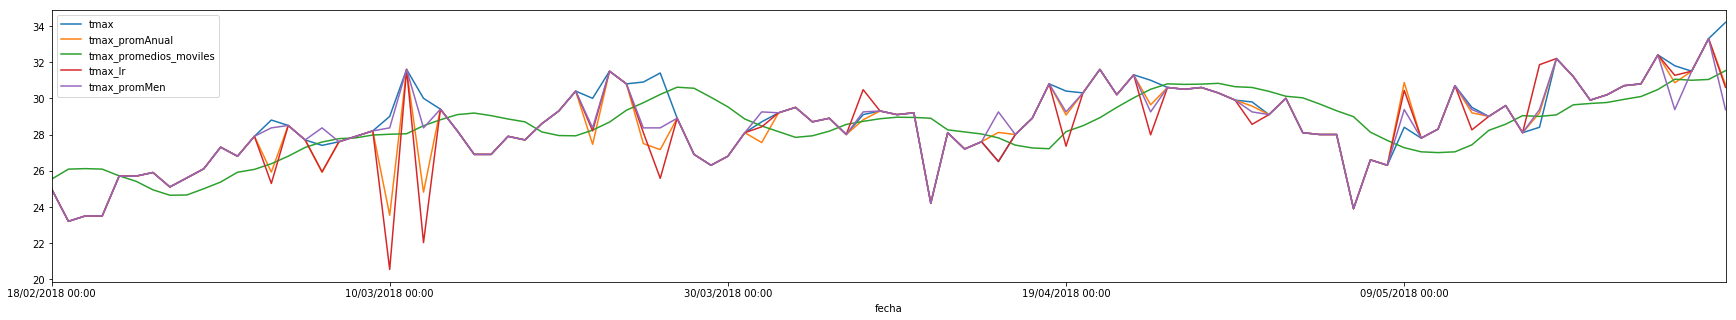

In [44]:
df_graph[['tmax','tmax_promAnual','tmax_promedios_moviles','tmax_lr','tmax_promMen']].plot(figsize=(30,5))

## Tmin

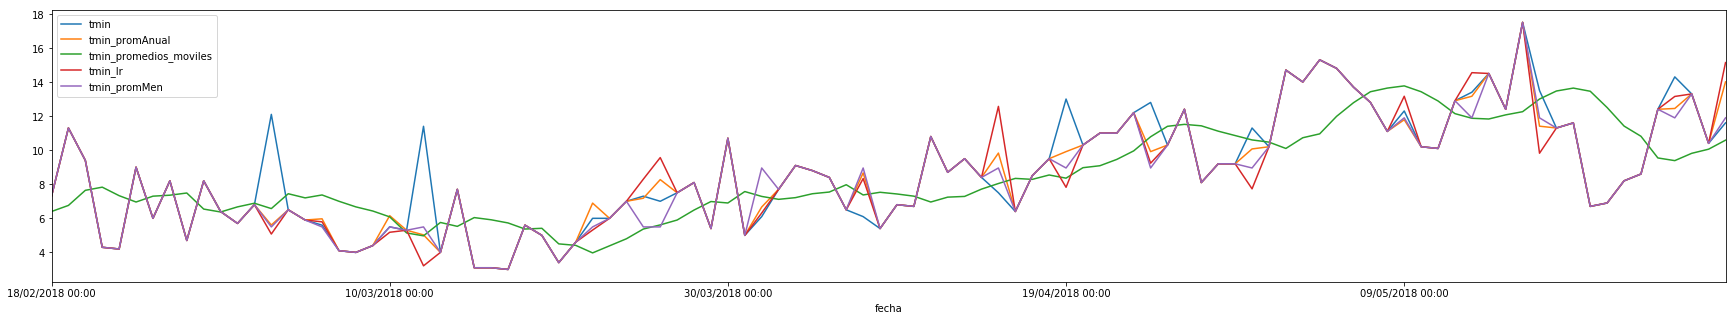

In [45]:
df_graph[['tmin','tmin_promAnual','tmin_promedios_moviles','tmin_lr','tmin_promMen']].plot(figsize=(30,5))

# Gráfica de puntos

In [46]:
# librerías
import seaborn as sns

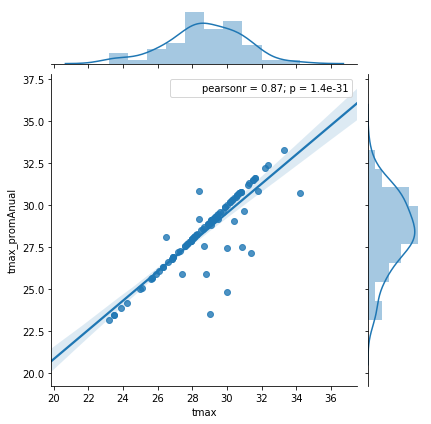

In [47]:
sns.jointplot("tmax", "tmax_promAnual", data=df_graph, kind="reg")

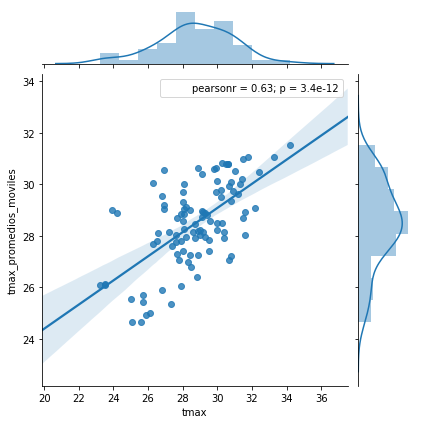

In [48]:
sns.jointplot("tmax", "tmax_promedios_moviles", data=df_graph, kind="reg")

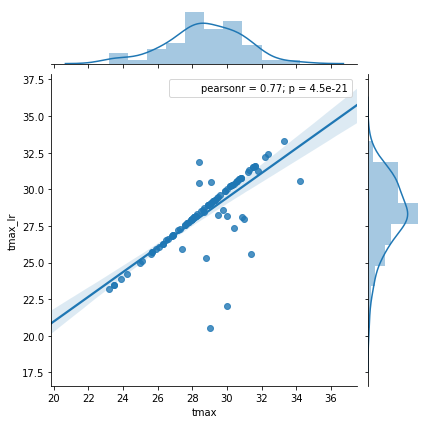

In [49]:
sns.jointplot("tmax", "tmax_lr", data=df_graph, kind="reg")

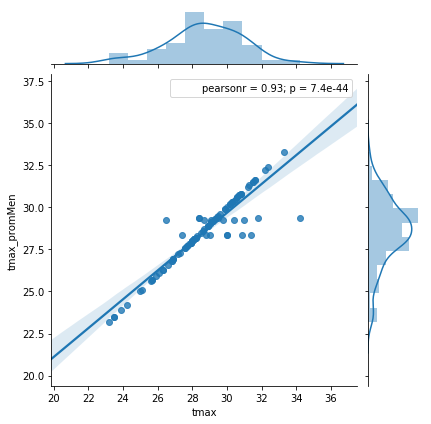

In [50]:
sns.jointplot("tmax", "tmax_promMen", data=df_graph, kind="reg")

# Gráfica Residual

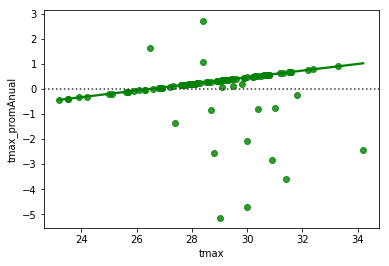

In [51]:
# promedios anuales
x = df_graph['tmax']
y = df_graph['tmax_promAnual']
sns.residplot(x, y, lowess=True, color="g")

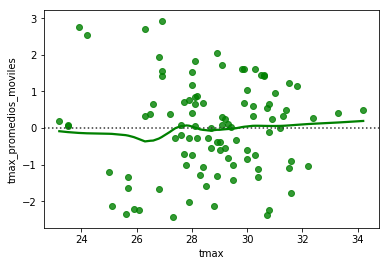

In [52]:
# promedios móviles
x = df_graph['tmax']
y = df_graph['tmax_promedios_moviles']
sns.residplot(x, y, lowess=True, color="g")

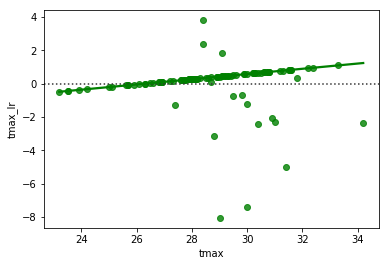

In [53]:
# linear regression
x = df_graph['tmax']
y = df_graph['tmax_lr']
sns.residplot(x, y, lowess=True, color="g")

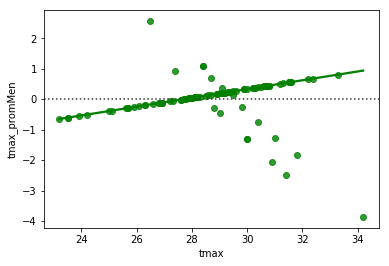

In [54]:
# promedio mensual
x = df_graph['tmax']
y = df_graph['tmax_promMen']
sns.residplot(x, y, lowess=True, color="g")

# Promedio diario

In [55]:
df_graph[['tmax','tmax_promAnual','tmax_promedios_moviles', 'tmax_lr','tmax_promMen']].mean()

tmax                      28.704000
tmax_promAnual            28.410725
tmax_promedios_moviles    28.472857
tmax_lr                   28.325388
tmax_promMen              28.560580
dtype: float64

# Desviación estandar

In [56]:
df_graph[['tmax','tmax_promAnual','tmax_promedios_moviles', 'tmax_lr','tmax_promMen']].std()

tmax                      2.160851
tmax_promAnual            2.159485
tmax_promedios_moviles    1.618655
tmax_lr                   2.357853
tmax_promMen              1.992002
dtype: float64

# Varianza

In [57]:
df_graph[['tmax','tmax_promAnual','tmax_promedios_moviles', 'tmax_lr','tmax_promMen']].var()

tmax                      4.669277
tmax_promAnual            4.663373
tmax_promedios_moviles    2.620043
tmax_lr                   5.559470
tmax_promMen              3.968072
dtype: float64

# OLS

In [58]:
# librería
from statsmodels.formula.api import ols

In [59]:
df_graph.head()

,numero,fecha,tmax,tmin,tmed,año,mes,dia,tmax_promAnual,tmin_promAnual,tmax_lr,tmin_lr,tmax_promMen,tmin_promMen,tmax_promedios_moviles,tmin_promedios_moviles
fecha,,,,,,,,,,,,,,,,
18/02/2018 00:00,22581,18/02/2018 00:00,25.0,7.3,16.56,2018,02,18,25.0,7.3,25.0,7.3,25.0,7.3,25.528571,6.400000
19/02/2018 00:00,22581,19/02/2018 00:00,23.2,11.3,16.63,2018,02,19,23.2,11.3,23.2,11.3,23.2,11.3,26.085714,6.757143
20/02/2018 00:00,22581,20/02/2018 00:00,23.5,9.4,15.67,2018,02,20,23.5,9.4,23.5,9.4,23.5,9.4,26.114286,7.642857
21/02/2018 00:00,22581,21/02/2018 00:00,23.5,4.3,14.64,2018,02,21,23.5,4.3,23.5,4.3,23.5,4.3,26.085714,7.828571
22/02/2018 00:00,22581,22/02/2018 00:00,25.7,4.2,15.80,2018,02,22,25.7,4.2,25.7,4.2,25.7,4.2,25.714286,7.328571


## tmax ~ tmax_promAnual

In [60]:
mod = ols(formula="tmax ~ tmax_promAnual", data=df_graph)

In [61]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   tmax   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     299.8
Date:                Thu, 31 May 2018   Prob (F-statistic):           1.42e-31
Time:                        10:51:56   Log-Likelihood:                -148.39
No. Observations:                 100   AIC:                             300.8
Df Residuals:                      98   BIC:                             306.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.0242      1.429      2.

## tmax ~ tmax_promedios_moviles

In [62]:
mod = ols(formula="tmax ~ tmax_promedios_moviles", data=df_graph)

In [63]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   tmax   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     63.01
Date:                Thu, 31 May 2018   Prob (F-statistic):           3.44e-12
Time:                        10:51:56   Log-Likelihood:                -193.62
No. Observations:                 100   AIC:                             391.2
Df Residuals:                      98   BIC:                             396.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

## tmax ~ tmax_lr

In [64]:
mod = ols(formula="tmax ~ tmax_lr", data=df_graph)

In [65]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   tmax   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     145.4
Date:                Thu, 31 May 2018   Prob (F-statistic):           4.52e-21
Time:                        10:51:56   Log-Likelihood:                -172.96
No. Observations:                 100   AIC:                             349.9
Df Residuals:                      98   BIC:                             355.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6408      1.670      5.175      0.0

# tmax ~ tmax_promMen

In [66]:
mod = ols(formula="tmax ~ tmax_promMen", data=df_graph)

In [67]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   tmax   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     609.6
Date:                Thu, 31 May 2018   Prob (F-statistic):           7.36e-44
Time:                        10:51:56   Log-Likelihood:                -119.60
No. Observations:                 100   AIC:                             243.2
Df Residuals:                      98   BIC:                             248.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0522      1.167     -0.045   

# Algoritmo de Burg

In [68]:
# def  burg(m,  x):
#     """
#     Based on Collomb's C++ code, pp. 10-11
#     Burgs Method, algorithm and recursion
#       m - number of lags in autoregressive model.
#       x - data vector to approximate.
#     """
#     N = len(x)-1
#     coeffs = [0.0] * m
    
#     # initialize Ak
#     Ak = [0.0]* (m+1)
#     Ak[0] = 1.0 
#     # initialize f and b.
#     f  = x[:]
#     b = x[:]
#     # Initialize Dk
#     Dk = 0.0
#     for j in range(0,  N+1):
#         Dk += 2.0 * f[j] * f[j]
#     Dk -= f[ 0 ] * f[ 0 ] + b[ N ] * b[ N ];

#     # Burg recursion
#     for k in range(m):
#         # compute mu
#         mu = 0.0;
#         for n in range(0,  N-k):
#             mu += f[ n + k + 1 ] * b[ n ]
#         mu *= -2.0 / Dk
        
#         # update Ak
#         maxn = (k+1)/2 + 1
#         for n in range(int(maxn)):
#             t1 = Ak[ n ] + mu * Ak[ k + 1 - n ];
#             t2 = Ak[ k + 1 - n ] + mu * Ak[ n ];
#             Ak[ n ] = t1;
#             Ak[ k + 1 - n ] = t2;
#         # update f and b
#         for n in range(N-k):
#             t1 = f[ n + k + 1 ] + mu * b[n]
#             t2 = b[ n ] + mu * f[ n + k + 1]
#             f[ n + k + 1 ] = t1;
#             b[ n ] = t2
            
#         # update Dk
#         Dk = ( 1.0 - mu * mu ) * Dk - f[ k + 1 ] * f[ k + 1 ] - b[ N - k - 1 ] * b[ N - k - 1 ];
    
#     # assign coefficients.
#     for i,  a in enumerate(Ak[1:]):
#          coeffs[i] =a
#     return coeffs

In [69]:
# # data to 
# original = df_graph['tmax']

# # get linear prediction coefficients.
# # using BurgAlgorithm( m, original )
# coeffs = burg(4,  original)

# # imprimir coeficientes
# print(coeffs)

# # Linear Predict Data
# predicted = [orig for orig in original]
# m = len(coeffs)
# for i in range(m,  len(predicted)):
#    predicted[i] = 0.0
#    for j in range(m):
#        predicted[ i ] -= coeffs[ j ] * original[i-1-j]

# # Calculate and display error.
# error = 0.0
# for i in range(len(predicted)):
#    print ("Index: %2d / Original: %.6f / Predicted: %.6f" % (i, original[i], predicted[i] ))
#    delta = predicted[i] - original[i]
#    error += delta * delta;
# print ("Burg Approximation Error: %f\n" % error)

# Unidades Calor

In [70]:
# Funciones
def metodoResidual(tmax, tmin, tbase, umbralSuperior, umbralInferior):
    '''
    Genera los GDD por medio del Método Residual
    param: tmax: temperatura máxima
    param: tmin: temperatura mínima
    param: tbase: temperatura base del cultivo
    param: umbralSuperior : umbral superior
    param: umbralInferior : umbral inferior
    '''
    if (tmax > umbralSuperior):
        tmax = umbralSuperior
    else:
        tmax = tmax
    if (tmin < umbralInferior):
        tmin = umbralInferior
    else:
        tmin = tmin
    gdd = ((tmax + tmin) / 2.0) - tbase

    if (gdd < 0):
        return 0.0
    else:
        return gdd

def metodoTrianguloSimple(tmax, tmin, umbralSuperior, umbralInferior):
    '''
    Genera los GDD por medio del Método Triángulo Simple
    param: tmax: temperatura máxima
    param: tmin: temperatura mínima
    param: umbralSuperior : umbral superior
    param: umbralInferior : umbral inferior
    '''
    if (tmin > umbralSuperior and tmax > umbralSuperior):
        return umbralSuperior - umbralInferior
    elif (tmax < umbralInferior and tmin < umbralInferior):
        return 0.0
    elif (tmin >= umbralInferior and tmax <= umbralSuperior):
        return ((6 * (tmax + tmin - 2.0 * umbralInferior)) / 12)
    elif (tmin < umbralInferior and tmax > umbralSuperior):
        dti = tmax - umbralInferior
        dts = tmax - umbralSuperior
        dt = tmax - tmin
        return ((6 * pow(dti, 2.0) / dt) - ((6 * pow(dts, 2.0)) / dt)) / 12
    elif (tmin < umbralInferior and tmax > umbralInferior and tmax < umbralSuperior):
        dti = tmax - umbralInferior
        dt = tmax - tmin
        return ((6 * (pow(dti, 2.0)) / dt)) / 12
    elif (tmin > umbralInferior and tmin < umbralSuperior and tmax > umbralSuperior):
        dt = tmax - tmin
        dts = tmax - umbralSuperior
        return ((6 * (tmax + tmin - 2.0 * umbralInferior)) / 12) - (((6 * pow(dts, 2.0)) / dt) / 12)
    else:
        return 0.0

# 	Metodo seno simple
# 	Subrutina para metodo del seno simple
def sinec(suma, diff, temp1):
    '''
    Genera los GDD de acuerdo al comportamiento del ángulo
    param: suma:
    param: diff:
    param: temp1:
    '''
    twopi = 6.2834
    pihlf = 1.5708
    d2 = temp1 - suma
    d3 = diff * diff
    d4 = d2 * d2
    d5 = math.sqrt(abs(d3 - d4))
    theta = math.atan2(d2, d5)
    if (d2 < 0 and theta > 0):
        theta = theta - 3.1416
    return (diff * math.cos(theta) - d2 * (pihlf - theta)) / twopi

# método del seno simple
def metodoSenoSimple(tmax, tmin, umbralSuperior, umbralInferior):
    '''
    Genera los GDD por medio del Método Seno Simple
    param: tmax: temperatura máxima
    param: tmin: temperatura mínima
    param: umbralSuperior : umbral superior
    param: umbralInferior : umbral inferior
    '''
    heat = 0.0
    if (tmin > umbralSuperior):
        heat = umbralSuperior - umbralInferior
    else:
        if (tmax <= umbralInferior):
            heat = 0.0
        else:
            temp1 = 2 * umbralInferior
            diff = tmax - tmin
            suma = tmax + tmin
            if (tmin >= umbralInferior):
                heat = (suma - temp1) / 2
            else:
                heat = sinec(suma, diff, temp1)
            if (tmax > umbralSuperior):
                temp1 = 2 * umbralSuperior
                zheat = heat
                heat = sinec(suma, diff, temp1)
                heat = zheat - heat
    gdd = heat
    return gdd

## Constantes

In [71]:
u_superior = 30
u_inferior = 0 
t_base = 3.3

## Residual

In [72]:
df_graph['uc_residual_tmax'] = (df_graph['tmax'] + df_graph['tmin']) / 2 - t_base

/Users/jorgemauricio/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
df_graph['uc_residual_limites_tmax'] = df_graph.apply(lambda x: metodoResidual(x['tmax'], x['tmin'], t_base, u_superior, u_inferior), axis=1)

/Users/jorgemauricio/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Seno simple

In [74]:
df_graph['uc_sin_tmax'] = df_graph.apply(lambda x: metodoSenoSimple(x['tmax'], t_base, u_superior, u_inferior), axis=1)

/Users/jorgemauricio/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Triángulo Simple

In [75]:
df_graph['uc_tri_tmax'] = df_graph.apply(lambda x: metodoTrianguloSimple(x['tmax'], t_base, u_superior, u_inferior), axis=1)

/Users/jorgemauricio/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


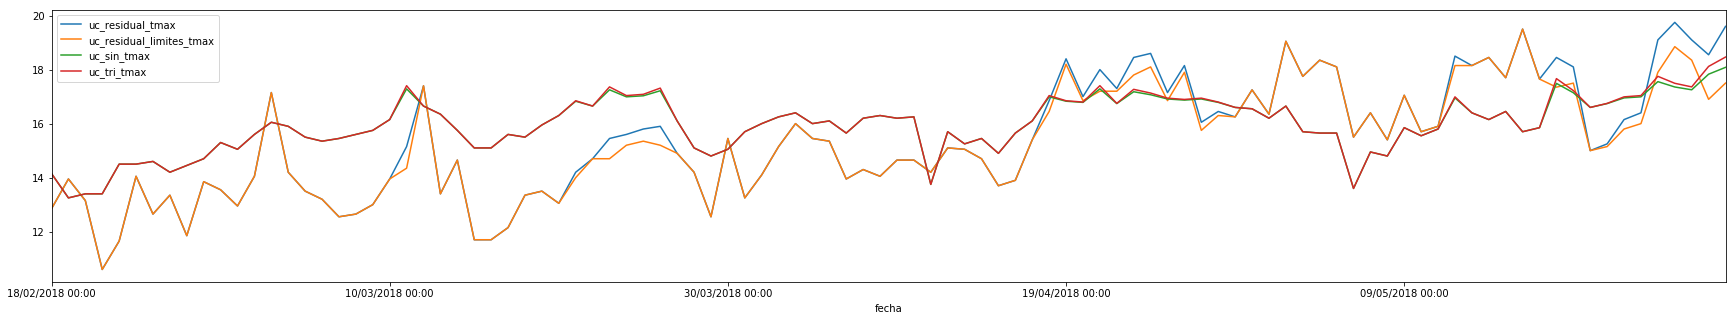

In [76]:
df_graph[['uc_residual_tmax','uc_residual_limites_tmax','uc_sin_tmax','uc_tri_tmax']].plot(figsize=(30,5))

## Acumulación

In [77]:
df_graph[['uc_residual_tmax','uc_residual_limites_tmax','uc_sin_tmax','uc_tri_tmax']].sum()

uc_residual_tmax            1543.300000
uc_residual_limites_tmax    1526.700000
uc_sin_tmax                 1596.730562
uc_tri_tmax                 1599.118384
dtype: float64

# Linear Least-Square Regression

In [78]:
# librería
from scipy import stats

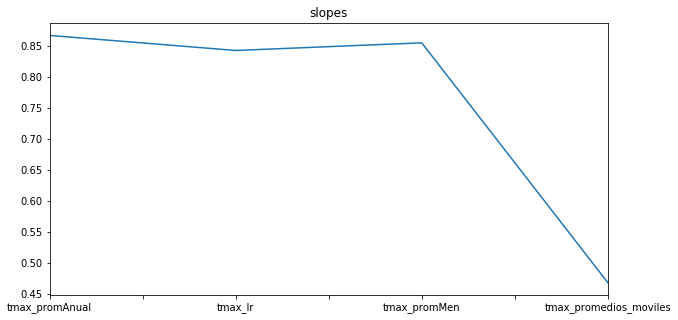

In [79]:
variables = ['tmax_promAnual', 'tmax_lr', 'tmax_promMen', 'tmax_promedios_moviles']
slopes = []
intercepts = []
r_values = []
r_values2s = []
p_values = []
std_errs = []

# ciclo
for variable in variables:
    X = np.array(df_graph['tmax'])
    y = np.array(df_graph[variable])
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    
    slopes.append(slope)
    intercepts.append(intercept)
    r_values.append(r_value)
    r_values2s.append(r_value**2)
    p_values.append(p_value)
    std_errs.append(std_err)
    
pd.Series(slopes, variables).plot(title="slopes", figsize=(10,5))

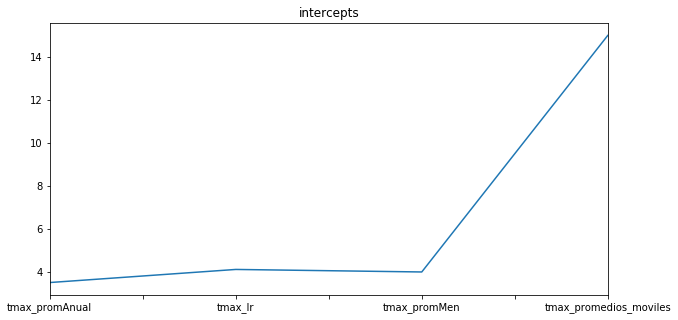

In [80]:
pd.Series(intercepts, variables).plot(title="intercepts", figsize=(10,5))

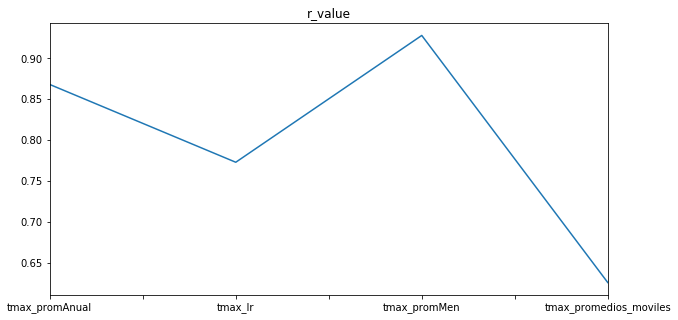

In [81]:
pd.Series(r_values, variables).plot(title="r_value", figsize=(10,5))


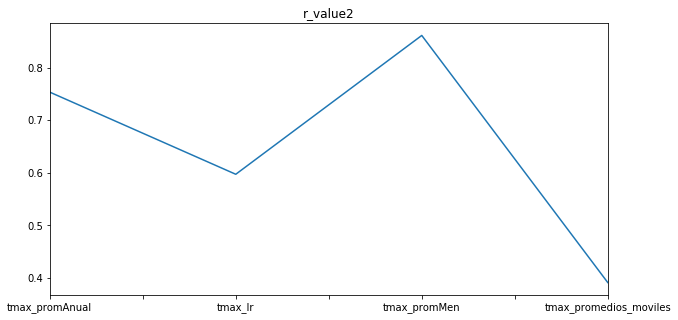

In [82]:
pd.Series(r_values2s, variables).plot(title="r_value2", figsize=(10,5))

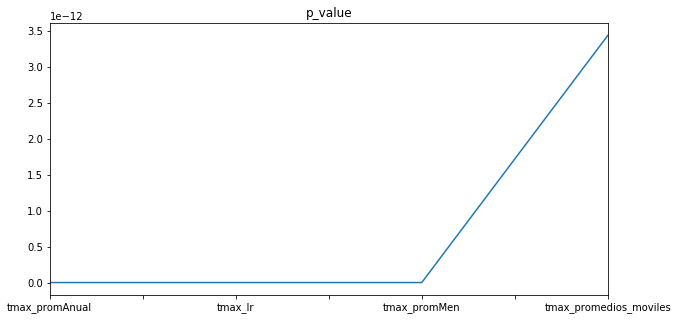

In [83]:

pd.Series(p_values, variables).plot(title="p_value", figsize=(10,5))

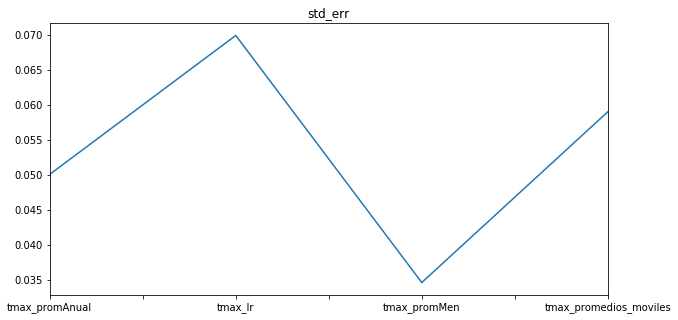

In [84]:

pd.Series(std_errs, variables).plot(title="std_err", figsize=(10,5))